In [1]:
import numpy as np
import pandas as pd
import sklearn

'''
Visualization decision trees:
https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
'''


# Plotting library
import matplotlib.pyplot as plt

# Preprocessing functions
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# ML functions
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
print(sklearn.__version__)

0.24.1


In [3]:
data = pd.read_csv('data/Absenteeism_at_work_AAA/Absenteeism_at_work.csv',
                   header=0,delimiter=";")
print("Size of the data: ", data.shape)
col_names = list(data.columns)

Size of the data:  (740, 21)


In [4]:
# Convert the pandas to numpy
data = np.array(data)
data_X = data[:,:-1]
data_Y = data[:,-1]
n_feature = data_X.shape[1]
print("number of features: ", n_feature)

# Generate Train/Test data
X_train, X_test, y_train, y_test = train_test_split(
       data_X, data_Y, test_size=0.33, random_state=0)

number of features:  20


In [5]:
# Let's do some normalization
# scaler = preprocessing.StandardScaler().fit(X_train)
# The same scaling 'object' applied to both train/test data
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

[Text(186.0, 195.696, 'X[1] <= 21.5\nmse = 184.585\nsamples = 495\nvalue = 6.806'),
 Text(148.8, 152.208, 'X[9] <= 233.459\nmse = 408.94\nsamples = 199\nvalue = 11.558'),
 Text(74.4, 108.72, 'X[19] <= 24.5\nmse = 1715.347\nsamples = 14\nvalue = 31.714'),
 Text(37.2, 65.232, 'mse = 0.0\nsamples = 2\nvalue = 112.0'),
 Text(111.60000000000001, 65.232, 'X[4] <= 2.5\nmse = 747.889\nsamples = 12\nvalue = 18.333'),
 Text(74.4, 21.744, 'mse = 88.066\nsamples = 11\nvalue = 10.545'),
 Text(148.8, 21.744, 'mse = 0.0\nsamples = 1\nvalue = 104.0'),
 Text(223.20000000000002, 108.72, 'X[18] <= 190.5\nmse = 277.004\nsamples = 185\nvalue = 10.032'),
 Text(186.0, 65.232, 'mse = 182.607\nsamples = 177\nvalue = 8.768'),
 Text(260.40000000000003, 65.232, 'X[9] <= 295.188\nmse = 1548.0\nsamples = 8\nvalue = 38.0'),
 Text(223.20000000000002, 21.744, 'mse = 867.556\nsamples = 3\nvalue = 82.667'),
 Text(297.6, 21.744, 'mse = 40.96\nsamples = 5\nvalue = 11.2'),
 Text(223.20000000000002, 152.208, 'mse = 8.366\ns

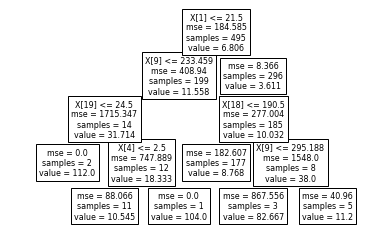

In [6]:
# Train a decision tree
DT_model = DecisionTreeRegressor(random_state=0, ccp_alpha=12)
DT_model.fit(X_train, y_train)
plot_tree(DT_model)

In [7]:
# Train a random forest model
RF_model = RandomForestRegressor(n_estimators=30)
RF_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [8]:
importances = RF_model.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(len(indices)):
    print("%d. %s (%f)" % (f + 1, col_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. Reason for absence (0.166155)
2. Work load Average/day  (0.162293)
3. Month of absence (0.115465)
4. Height (0.105329)
5. Seasons (0.081865)
6. Age (0.068520)
7. ID (0.053965)
8. Hit target (0.053019)
9. Day of the week (0.036516)
10. Son (0.031835)
11. Transportation expense (0.030002)
12. Weight (0.027689)
13. Distance from Residence to Work (0.015408)
14. Body mass index (0.014973)
15. Pet (0.010018)
16. Social drinker (0.007683)
17. Service time (0.006508)
18. Social smoker (0.005993)
19. Disciplinary failure (0.003491)
20. Education (0.003273)


In [9]:
importances = RF_model.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(len(indices)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.166155)
2. feature 9 (0.162293)
3. feature 2 (0.115465)
4. feature 18 (0.105329)
5. feature 4 (0.081865)
6. feature 8 (0.068520)
7. feature 0 (0.053965)
8. feature 10 (0.053019)
9. feature 3 (0.036516)
10. feature 13 (0.031835)
11. feature 5 (0.030002)
12. feature 17 (0.027689)
13. feature 6 (0.015408)
14. feature 19 (0.014973)
15. feature 16 (0.010018)
16. feature 14 (0.007683)
17. feature 7 (0.006508)
18. feature 15 (0.005993)
19. feature 11 (0.003491)
20. feature 12 (0.003273)


## More Visualizations

In [10]:
from sklearn.inspection import plot_partial_dependence

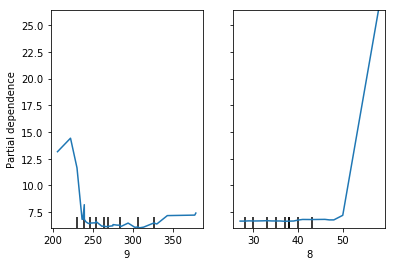

In [11]:
plot_partial_dependence(RF_model, X_train, [9,8]) 

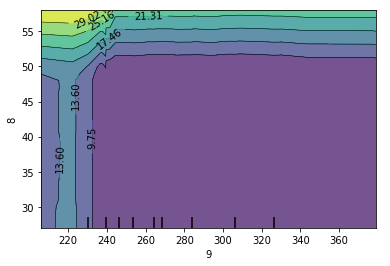

In [12]:
plot_partial_dependence(RF_model, X_train, [[9,8]]) 

In [13]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [14]:
def plot_vis(i_feature, model, data):
    '''
    Visualize data slice by slice
    '''
    plot_partial_dependence(model, data, [i_feature]) 
    plt.xlabel(col_names[i_feature])
    plt.show()
    #print(data[x,:])

In [15]:
interact(plot_vis, i_feature=widgets.IntSlider(min=0,max=19), 
         model=fixed(RF_model), data=fixed(X_train))

interactive(children=(IntSlider(value=0, description='i_feature', max=19), Output()), _dom_classes=('widget-in…

<function __main__.plot_vis(i_feature, model, data)>

In [16]:
def plot_vis(i_feature, data_Y, data):
    '''
    Visualize data slice by slice
    '''
    plt.plot(data[:,i_feature], data_Y,'o', color='black') 
    plt.xlabel(col_names[i_feature])
    plt.ylabel("absent hours")
    plt.show()
    #print(data[x,:])

In [17]:
interact(plot_vis, i_feature=widgets.IntSlider(min=0,max=19), 
         data_Y=fixed(y_train), data=fixed(X_train))

interactive(children=(IntSlider(value=0, description='i_feature', max=19), Output()), _dom_classes=('widget-in…

<function __main__.plot_vis(i_feature, data_Y, data)>